# Data Preparation

In [14]:
!pip install roboflow
!pip install ultralytics==8.0.134

In [16]:
# Get API key from user input
api_key = input("Enter your Roboflow API key: ")

from roboflow import Roboflow

# Initialize Roboflow with the user-provided API key
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(2).download("yolov8")


Enter your Roboflow API key: snsJF3dN4IRCsZ481cGc
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-2 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 1688.62it/s]


In [17]:
dataset.location


'/content/football-players-detection-2'

In [18]:
# import libraries
from ultralytics import YOLO

from IPython.display import display, Image


# command for yolo

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.0.194 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/football-players-detection-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nm

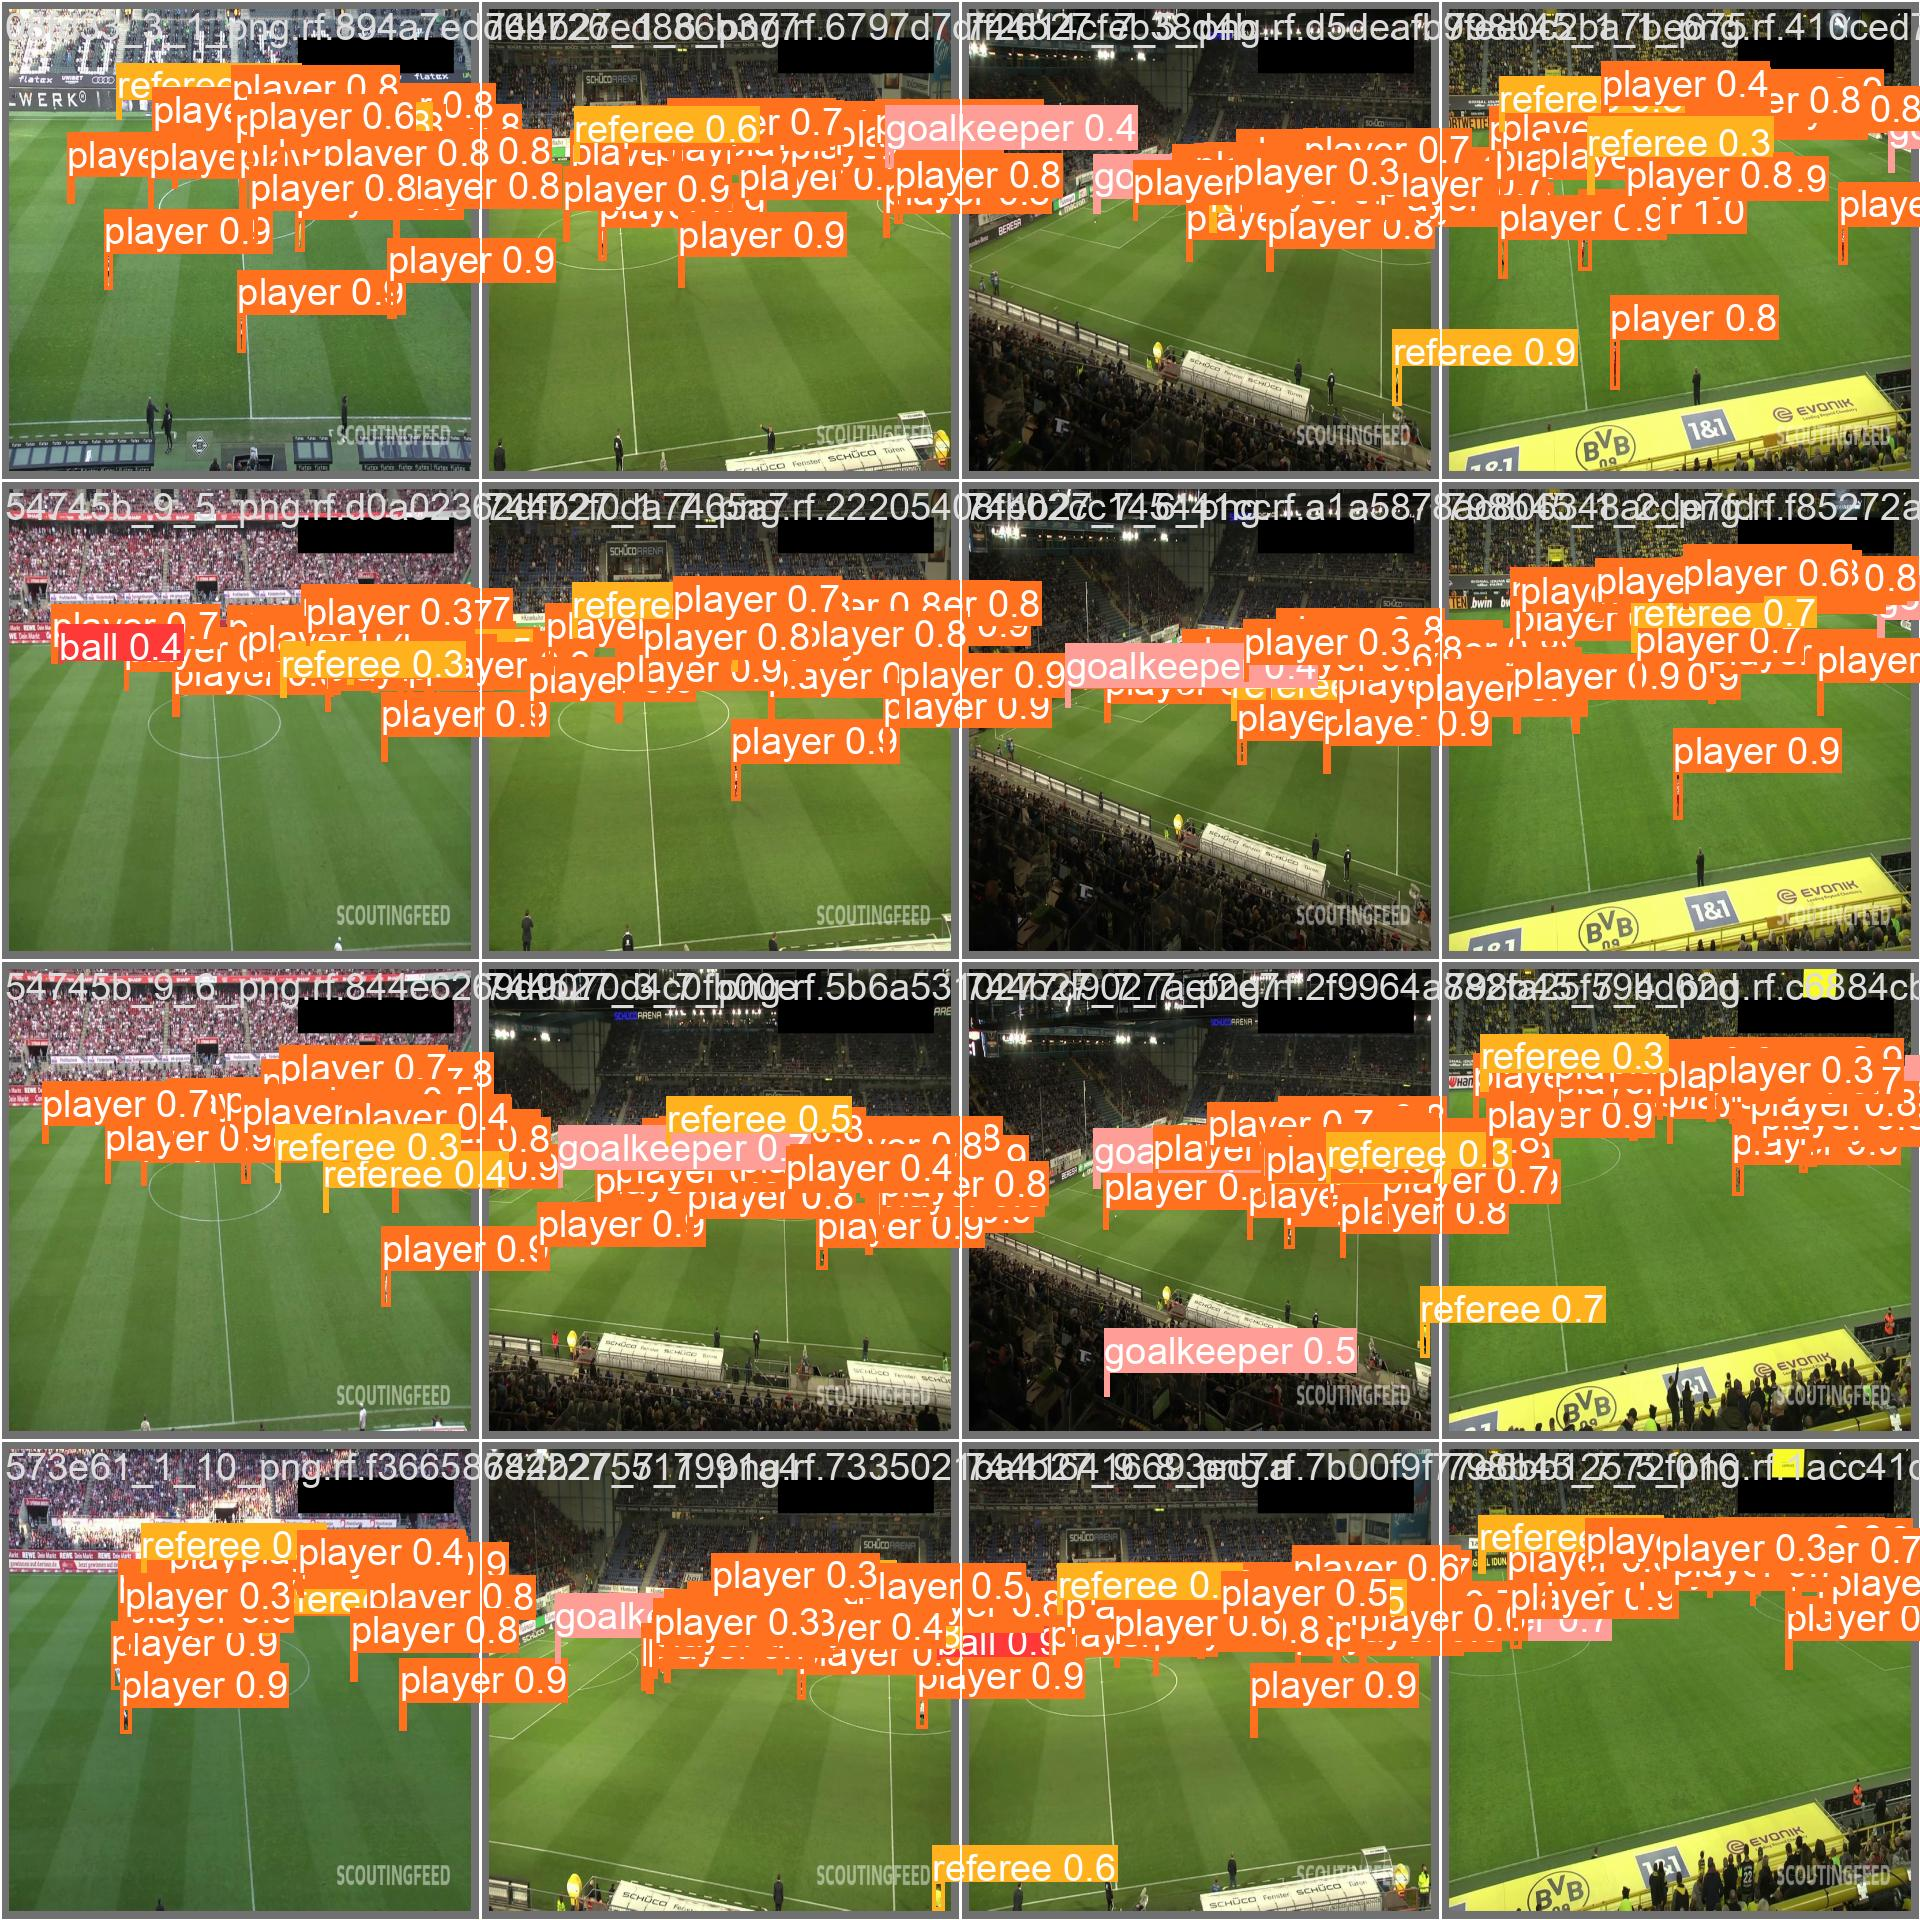

In [19]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [20]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop
!pip install cython_bbox

[Errno 2] No such file or directory: '{HOME}'
/content
fatal: destination path 'ByteTrack' already exists and is not an empty directory.
  Using cached loguru-0.7.2-py3-none-any.whl (62 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
  Using cached lap-0.4.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached motmetrics-1.4.0-py3-none-any.whl (161 kB)
  Using cached filterpy-1.4.5.zip (177 kB)
  Preparing metadata (setup.py) ... done
  Using cached onnx-1.8.1.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.12.0, 1.12.1, 1.13.1, 1.14.0, 1.14.1, 1.15.0, 1.15.1, 1.16.0)
ERROR: No matching distribution found for

In [22]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow



# # Load the YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')


# Open the video file
video_path = "/content/0a2d9b_2.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(source="/content/0a2d9b_2.mp4", show=True, tracker="bytetrack.yaml")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/750) /content/0a2d9b_2.mp4: 480x800 19 players, 1 referee, 18.7ms
video 1/1 (2/750) /content/0a2d9b_2.mp4: 480x800 20 players, 18.6ms
video 1/1 (3/750) /content/0a2d9b_2.mp4: 480x800 19 players, 1 referee, 22.0ms
video 1/1 (4/750) /content/0a2d9b_2.mp4: 480x800 19 players, 1 referee, 20.8ms
video 1/1 (5/750) /content/0a2d9b_2.mp4: 480x800 20 players, 1 referee, 16.4ms
v

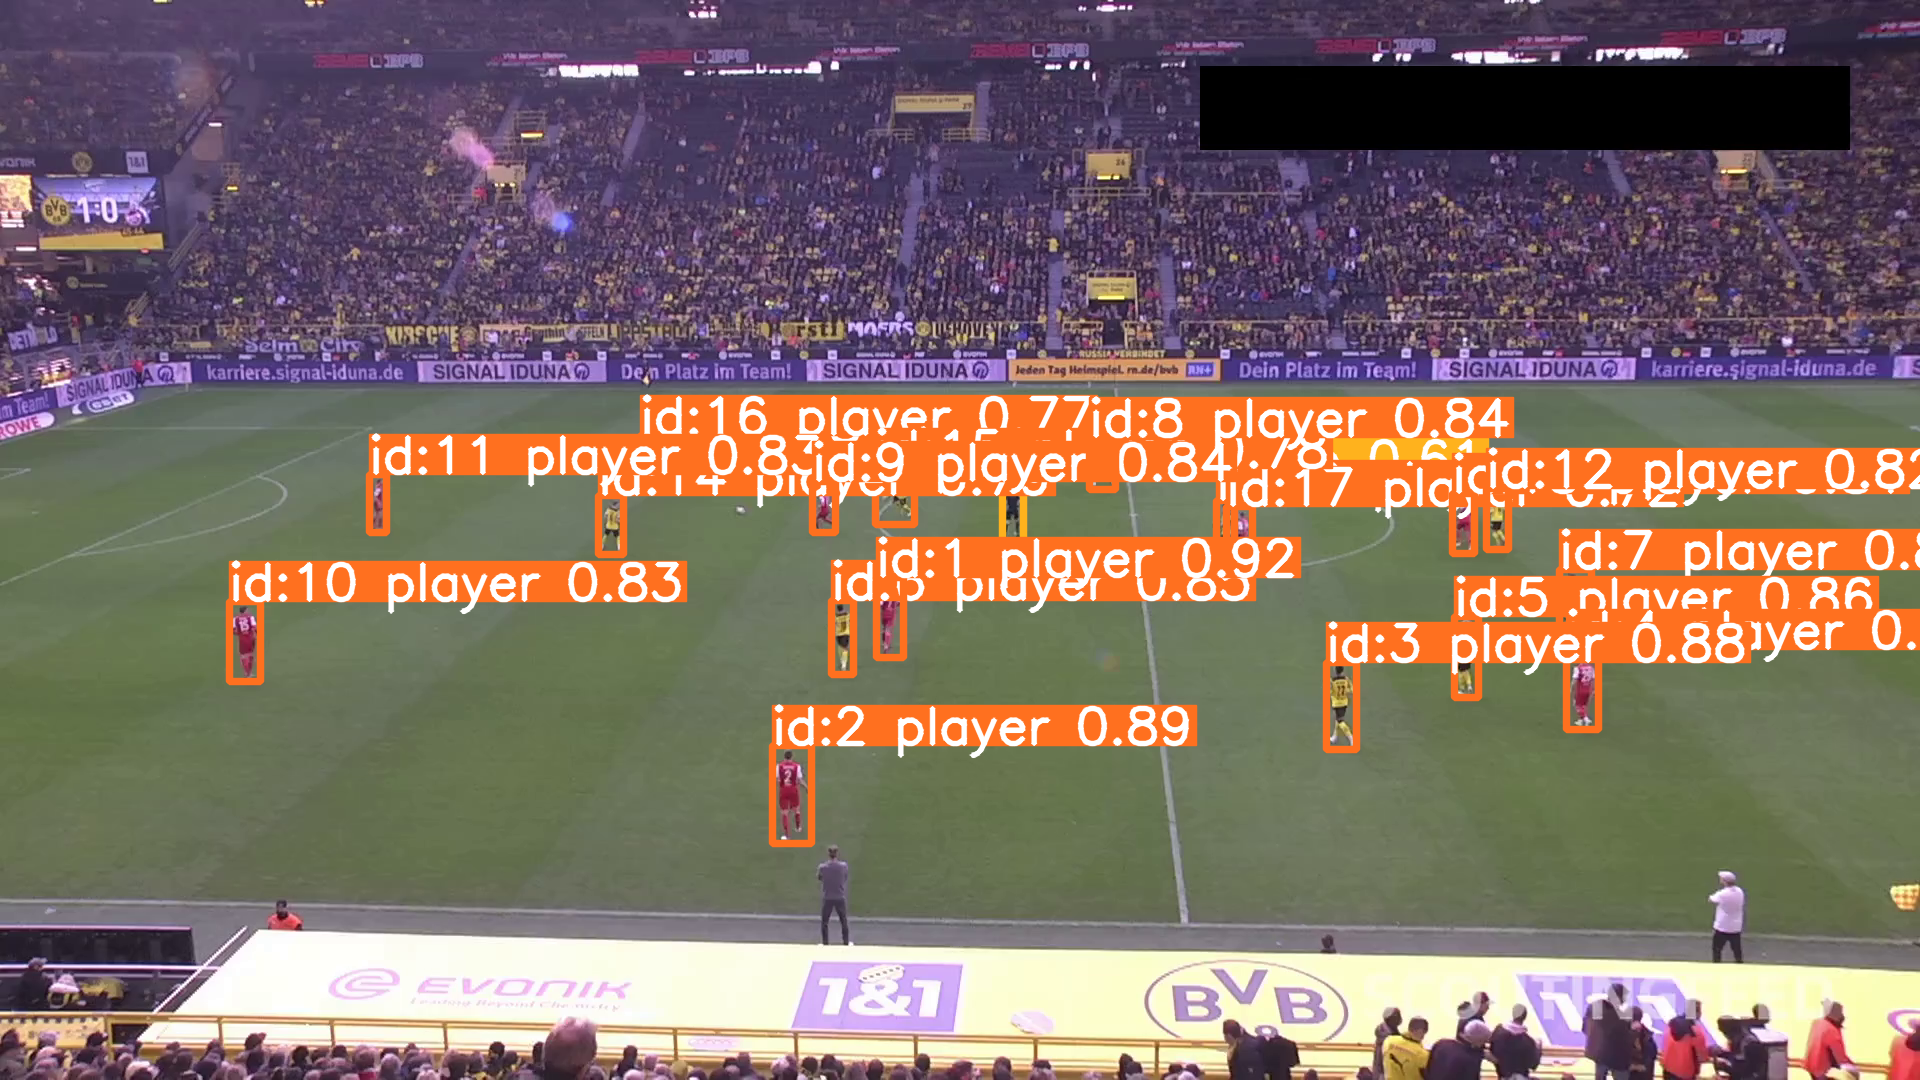

In [23]:
cv2_imshow(results[0].plot())